# Correlation between TreeLoss AND CO2 by countries

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('TreeCoverLoss_2001-2020 _InPrimaryForest.csv')
data

,CountryCode,Year,TreeCoverLoss_ha,GrossEmissions_Co2_all_gases_Mg
0,AGO,2001,4957.597965,3.021078e+06
1,ARG,2001,5979.947498,2.253298e+06
2,AUS,2001,0.075922,2.885012e+01
3,BDI,2001,6.222930,3.288072e+03
4,BES,2001,0.146932,6.125723e+01
...,...,...,...,...
1858,VNM,2020,32619.892720,2.396140e+07
1859,VUT,2020,1674.549459,1.014267e+06
1860,ZAF,2020,879.927136,5.434708e+05
1861,ZMB,2020,2143.134178,1.009848e+06


In [5]:
import seaborn as sns

df = data[['TreeCoverLoss_ha', 'GrossEmissions_Co2_all_gases_Mg']]

In [7]:
pearson_corr = df.corr(method='pearson')  # compute the pearson_correlation
pearson_corr

,TreeCoverLoss_ha,GrossEmissions_Co2_all_gases_Mg
TreeCoverLoss_ha,1.000000,0.990676
GrossEmissions_Co2_all_gases_Mg,0.990676,1.000000


In [8]:
spearman_corr = df.corr(method='spearman') # compute the spearman_correlation
spearman_corr

,TreeCoverLoss_ha,GrossEmissions_Co2_all_gases_Mg
TreeCoverLoss_ha,1.000000,0.996995
GrossEmissions_Co2_all_gases_Mg,0.996995,1.000000


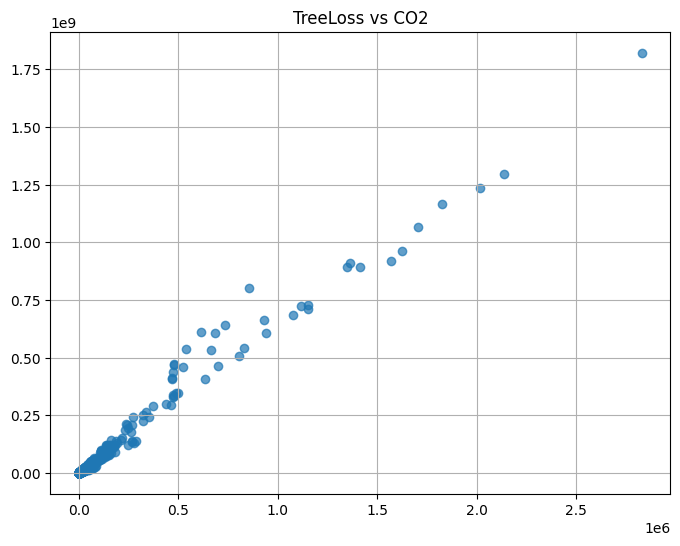

In [9]:
# scatter plot
plt.figure(figsize=(8,6))
plt.scatter(df['TreeCoverLoss_ha'], df['GrossEmissions_Co2_all_gases_Mg'], alpha=0.7)
plt.title('TreeLoss vs CO2')
plt.grid(True)
plt.show()


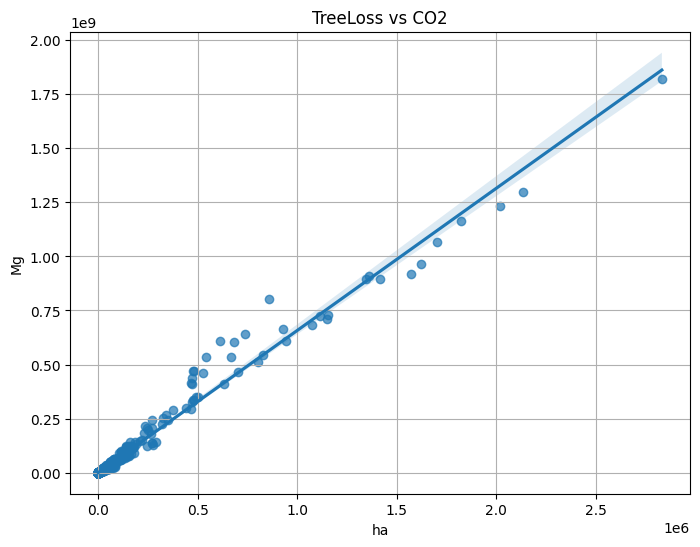

In [10]:
# scatter with regression line
plt.figure(figsize=(8,6))
sns.regplot(x='TreeCoverLoss_ha', y='GrossEmissions_Co2_all_gases_Mg', data=df, scatter_kws={'alpha':0.7})
plt.title('TreeLoss vs CO2')
plt.xlabel('ha')
plt.ylabel('Mg')
plt.grid(True)
plt.show()


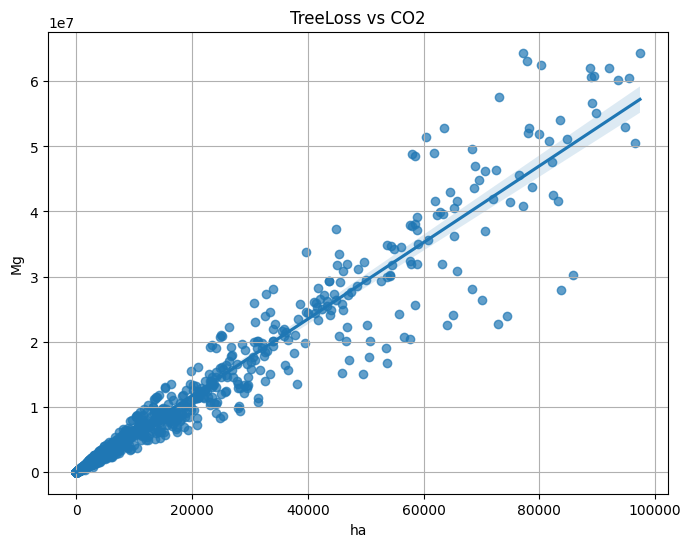

In [12]:
small = df[df['TreeCoverLoss_ha'] < 0.1*1e6]
plt.figure(figsize=(8,6))
sns.regplot(x='TreeCoverLoss_ha', y='GrossEmissions_Co2_all_gases_Mg', data=small, scatter_kws={'alpha':0.7})
plt.title('TreeLoss vs CO2')
plt.xlabel('ha')
plt.ylabel('Mg')
plt.grid(True)
plt.show()


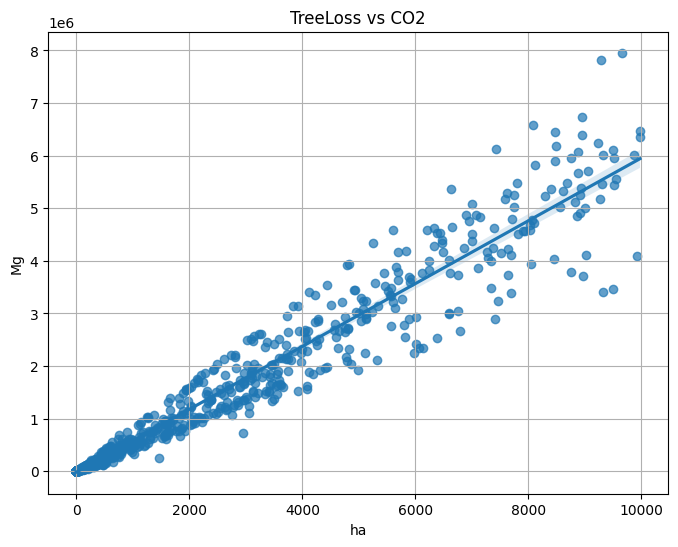

In [13]:
small = df[df['TreeCoverLoss_ha'] < 0.1*1e5]
plt.figure(figsize=(8,6))
sns.regplot(x='TreeCoverLoss_ha', y='GrossEmissions_Co2_all_gases_Mg', data=small, scatter_kws={'alpha':0.7})
plt.title('TreeLoss vs CO2')
plt.xlabel('ha')
plt.ylabel('Mg')
plt.grid(True)
plt.show()

                                       OLS Regression Results                                       
Dep. Variable:     GrossEmissions_Co2_all_gases_Mg   R-squared (uncentered):                   0.957
Model:                                         OLS   Adj. R-squared (uncentered):              0.957
Method:                              Least Squares   F-statistic:                          3.887e+04
Date:                             Mon, 25 Nov 2024   Prob (F-statistic):                        0.00
Time:                                     22:31:00   Log-Likelihood:                         -28231.
No. Observations:                             1752   AIC:                                  5.646e+04
Df Residuals:                                 1751   BIC:                                  5.647e+04
Df Model:                                        1                                                  
Covariance Type:                         nonrobust                                         

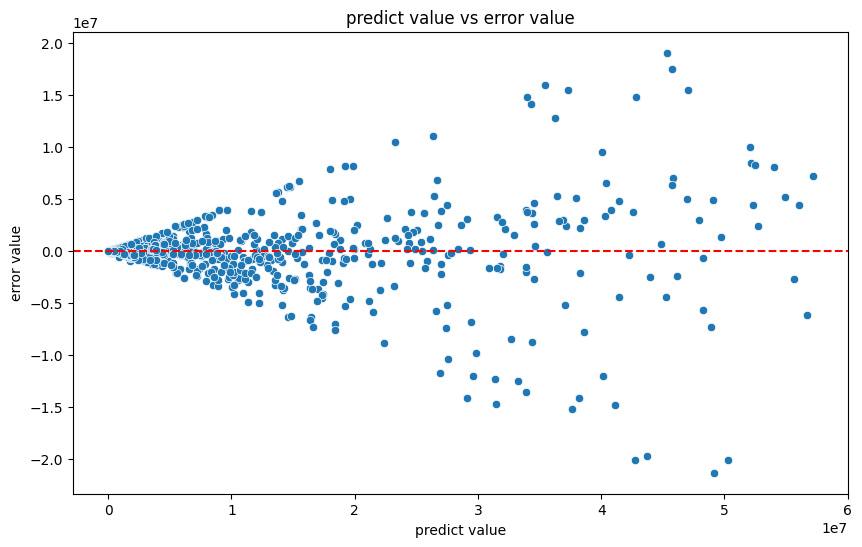

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

small = df[df['TreeCoverLoss_ha'] < 0.1*1e6]
y = small['GrossEmissions_Co2_all_gases_Mg']
X = small['TreeCoverLoss_ha']
model = sm.OLS(y, X).fit()
print(model.summary())

# predict
y_pred = model.predict(X)

# residual
residuals = y - y_pred

# plot
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('predict value')
plt.ylabel('error value')
plt.title('predict value vs error value')
plt.show()


#### We found that the error increases when predict value increases. This is Heteroscedasticity. Based on this analysis, we will go beyond OLS.

In [21]:
abs_residuals = np.abs(residuals)

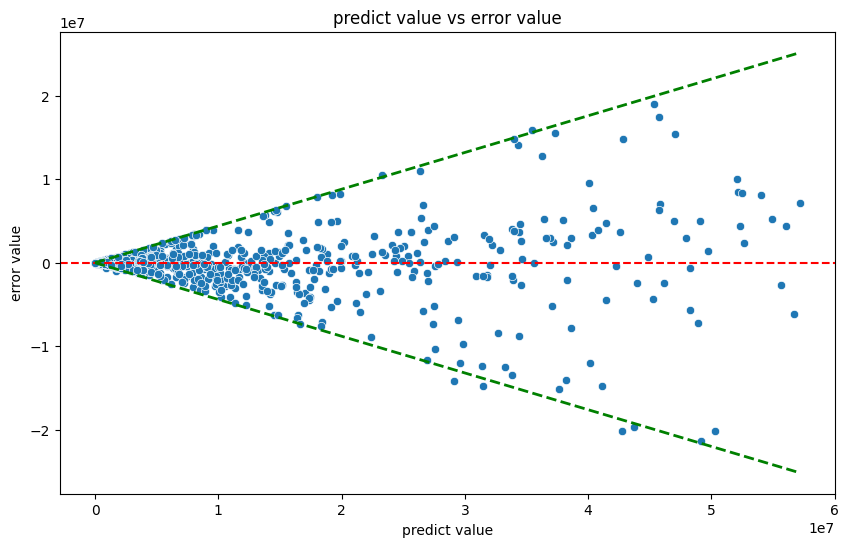

In [26]:
# plot
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('predict value')
plt.ylabel('error value')
plt.title('predict value vs error value')
# y = 0.4x
x_line = np.linspace(df['y_pred'].min(), df['y_pred'].max(), 100)
y_line = 0.44 * x_line
plt.plot(x_line, y_line, label='y = 0.4x', color='green', linestyle='--', linewidth=2)
# y = -0.4x
x_line = np.linspace(df['y_pred'].min(), df['y_pred'].max(), 100)
y_line = -0.44 * x_line
plt.plot(x_line, y_line, label='y = 0.4x', color='green', linestyle='--', linewidth=2)

plt.show()


#### CO2 = 586.81 * TreeLoss (± 0.44 TreeLoss)